In [1]:
# Importing the Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix

import tensorflow as tf 
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.models import Model

In [2]:
# Importing the dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
# Printing the shape
print(f'x train shape:{x_train.shape}')
print(f'x test shape:{x_test.shape}')
print(f'y train shape:{y_train.shape}')
print(f'y test shape:{x_test.shape}')

x train shape:(60000, 28, 28)
x test shape:(10000, 28, 28)
y train shape:(60000,)
y test shape:(10000, 28, 28)


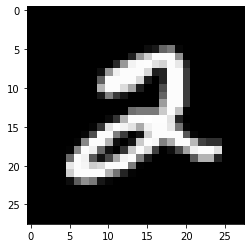

In [4]:
# Plotting a numeral
plt.imshow(x_train[5],cmap='gray')
plt.show()

In [5]:
# Reducing the dimension from 0 to 255 to 0 to 1
x_train=x_train/255.0
x_test=x_test/255.0

In [6]:
# Number of classes
K=len(set(y_train))
print(f'No of Classes: {K}')

No of Classes: 10


In [8]:
# Building the model
i=Input(shape=(x_train[0].shape))
x=LSTM(128)(i)
x=Dense(10,activation='softmax')(x)

model=Model(i,x)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compiling and fitting the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0457 - val_accuracy: 0.9866
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0343 - val_accuracy: 0.9903
Epoch 4/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0451 - val_accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0374 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0391 -

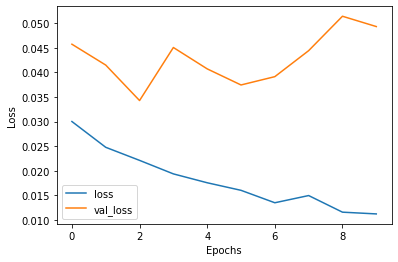

In [11]:
# Plotting the losses and the accuracy
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

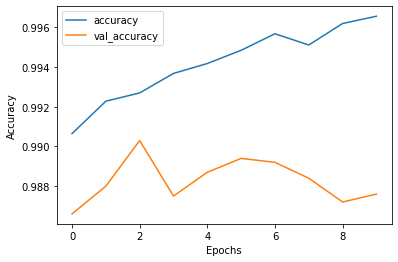

In [12]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [13]:
# Predicting the dataset
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

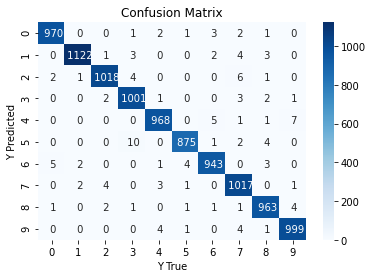

In [14]:
# Calculating Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,fmt=' ',cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Y True')
ax.set_ylabel('Y Predicted');

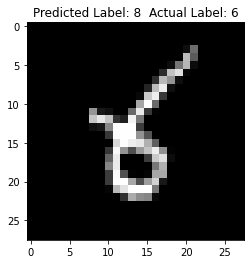

In [16]:
# Checking some where the model identified wrong
missclassified_idx=np.where(y_pred!=y_test)[0]
i=np.random.choice(missclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('Predicted Label: %s  Actual Label: %s' %(y_pred[i],y_test[i]))
plt.show()